In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

boston = datasets.fetch_california_housing()
print(boston.DESCR)
features_name = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
df = pd.DataFrame(boston.data, columns=features_name)
df_target = pd.DataFrame(boston.target, columns=['MedHouseVal'])
df.head()
##df_target.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LinearRegression   

model = LinearRegression() 


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit the scaler to the training data
X_test_scaled = scaler.transform(X_test) # Transform the test data using the fitted scaler


Mean Squared Error: 0.5558915986952444
R^2 Score: 0.5757877060324508


Text(0.5, 0, 'Actual Values')

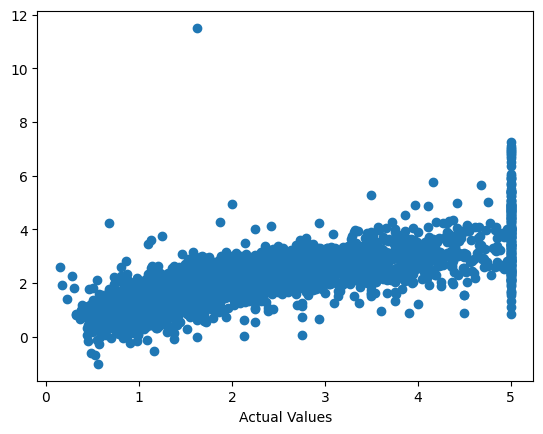

In [8]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")

In [9]:
#novo_imovel = np.array([[8.0, 40.0, 7.0, 1.0, 1000.0, 2.5, 38.0, -122.0]])
novo_imovel = np.array([[8.3252, 41.0, 6.984127, 1.023810, 322.0, 2.555556, 37.88, -122.23]]) 

novo_imovel_scaled = scaler.transform(novo_imovel)

previsao = model.predict(novo_imovel_scaled)

# Tente indexar para obter o valor numérico
valor_previsao = previsao.flatten()[0]

# Ou tente indexar com duas dimensões, se necessário
# valor_previsao = previsao[0][0]

print(f"O preço mediano previsto para este imóvel é de: ${valor_previsao * 100000:.2f}")


O preço mediano previsto para este imóvel é de: $415194.31


c:\Users\JORGE BRX\miniconda3\envs\py310_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


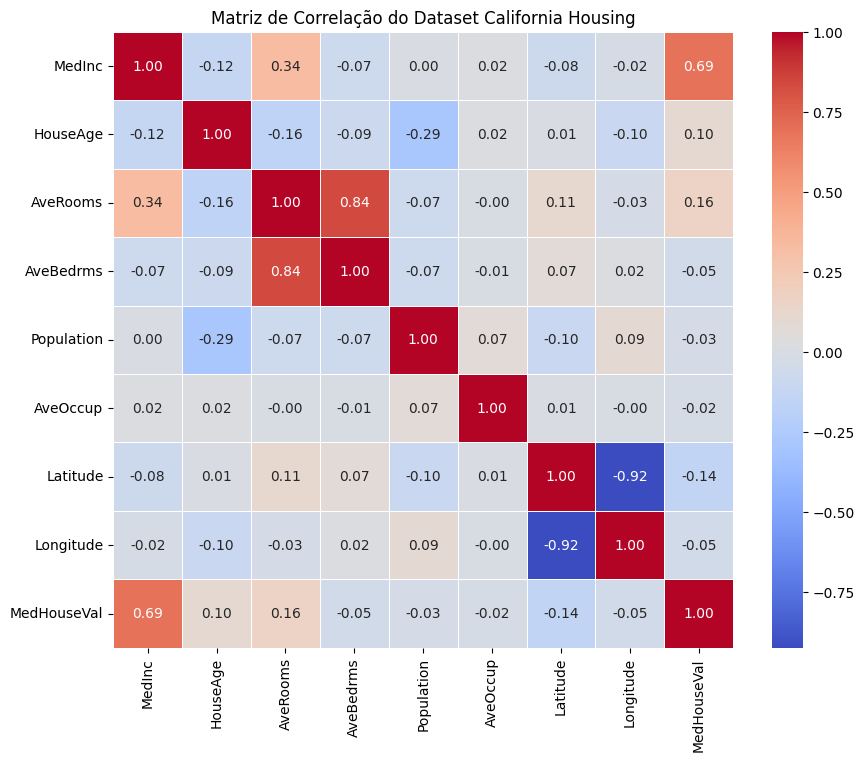

In [10]:
import seaborn as sns

# Juntar os dados de treinamento e a variável target
# (assumindo que X_train e y_train já foram criados)
df_corr = X_train.copy()
df_corr['MedHouseVal'] = y_train

# Calcular a matriz de correlação
matriz_correlacao = df_corr.corr()

# Criar e plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação do Dataset California Housing')
plt.show()